In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('_datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

_datasets\gender_submission.csv
_datasets\test.csv
_datasets\train.csv


# 1. Get the data

In [2]:
# LOAD TRAIN AND TEST DATA AND PRINT TRAIN HEAD
train_data = pd.read_csv('_datasets/train.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# PRINT COLUMNS
train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

The attributes have the following meaning:

* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name, Sex, Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# DESCRIBE NUMERICAL COLUMNS
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Age, Cabin, Embarkment contain null values. 

Cabin attribute is missing most of its values and will be ignored.

PassengerId correspond to index and doesn't bring any value, hence will be ignored.

In [6]:
train_data.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

# 2. Explore the data

### 2.1 Survived as prediction target

In [7]:
# COUNT SURVIVED VALUES
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
# OVERALL SURVIVED RATE
train_data.Survived.value_counts()/len(train_data.Survived)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

38% of passengers specified in the dataset have survived. 342 of 891.

### 2.2 Pclass

In [9]:
# SURVIVAL RATE PER CLASS
pd.crosstab(train_data['Pclass'], train_data['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
# SURVIVAL RATE PER CLASS
pd.crosstab(train_data['Pclass'], train_data['Survived']).apply(lambda r:r/r.sum(), axis=1)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Survival rate drops with each lower class.
62% passengers from class 1 have survived, while only 24% from class 3.

### 2.3 Name

In [11]:
# Count how many unique values are in Name attribute
train_data.Name.nunique()

891

Looks as all names are unique and the column name in this form will be not of any use. However each name contains a title which will be explored further.

### 2.4 Sex

In [12]:
# PASSENGER COUNT BY SEX
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
pd.crosstab(train_data['Sex'], train_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [14]:
# SURVIVAL RATE BY SEX

pd.crosstab(train_data['Sex'], train_data['Survived']).apply(lambda r:r/r.sum(), axis=1)

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


### 2.5 Age

Age attribute has about 19% missing values, which will be replaced with median.

In [15]:
# PASSENGERS WITH MISSING AGE VALUES
train_data[train_data.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


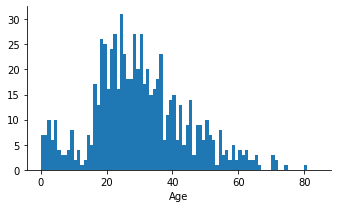

In [16]:
g = sns.FacetGrid(train_data, height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
g.map(plt.hist, 'Age', bins=bins)

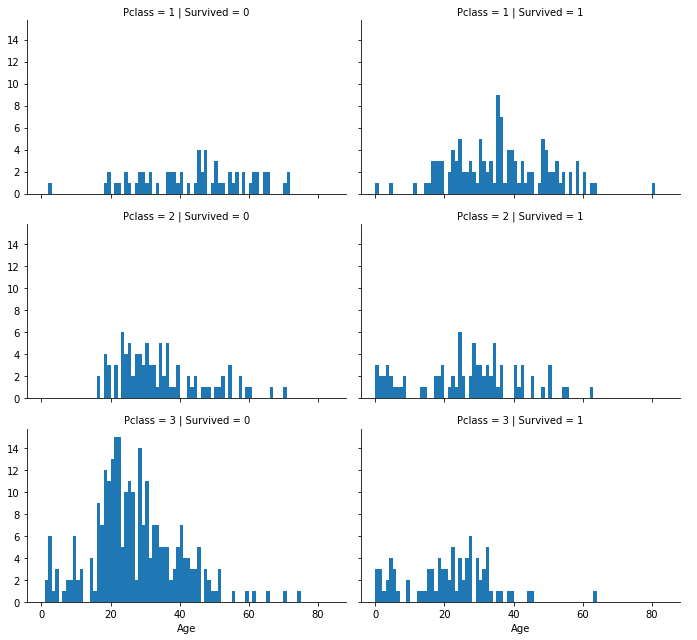

In [17]:
# AGE HISTOGRAM PER PCLASS AND SURVIVED
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
grid.map(plt.hist, 'Age', bins=bins)
grid.add_legend()

In [18]:
train_data['Age'].median()

28.0

In [19]:
train_data[['Age', 'Pclass']].groupby(['Pclass']).median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


#### 2.5.1 Option 1 fillna with Age median

In [20]:
# FILL MISSING AGE DATA WITH MEDIAN VALUE
age_fillna_test = train_data.copy()
age_fillna_test['Age'] = age_fillna_test['Age'].fillna((age_fillna_test['Age'].median()))
# PRINT SAMPLE VALUES
age_fillna_test.loc[[5, 17, 19]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,C


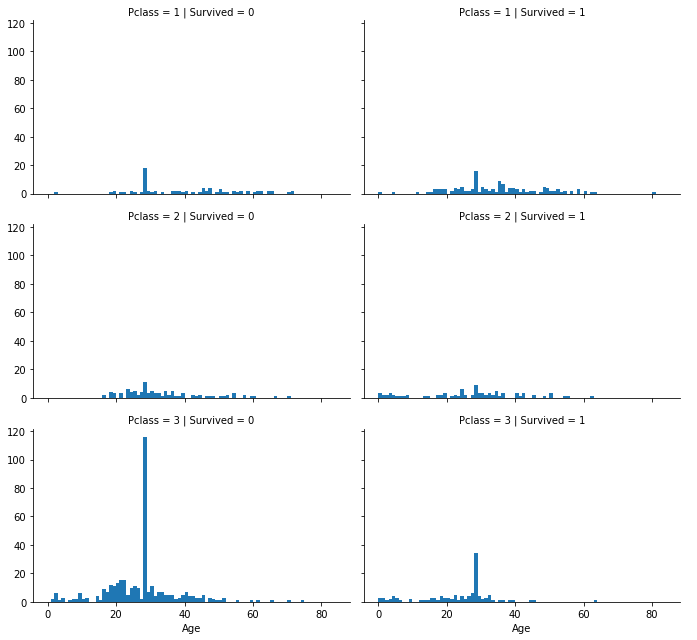

In [21]:
# AGE HISTOGRAM PER PCLASS AND SURVIVED
grid = sns.FacetGrid(age_fillna_test, col='Survived', row='Pclass', height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
grid.map(plt.hist, 'Age', bins=bins)
grid.add_legend()

In [22]:
train_data[['Age', 'Pclass']].groupby(['Pclass']).mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


#### 2.5.2 Option 2: Fillna with Age median corresponding to Pclass 

In [23]:
def fill_age_per_class(df_):
    df = df_.copy()
    for i in df.Pclass.unique().tolist():
        mask = (df['Pclass'] == i)
        median = df.loc[mask, 'Age'].median()
        df.loc[mask, 'Age'] = df.loc[mask, 'Age'].fillna(median)
    return df

age_fillna_test2 = fill_age_per_class(train_data)
age_fillna_test2.loc[[5, 17, 19]]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,24.0,0,0,2649,7.2250,C


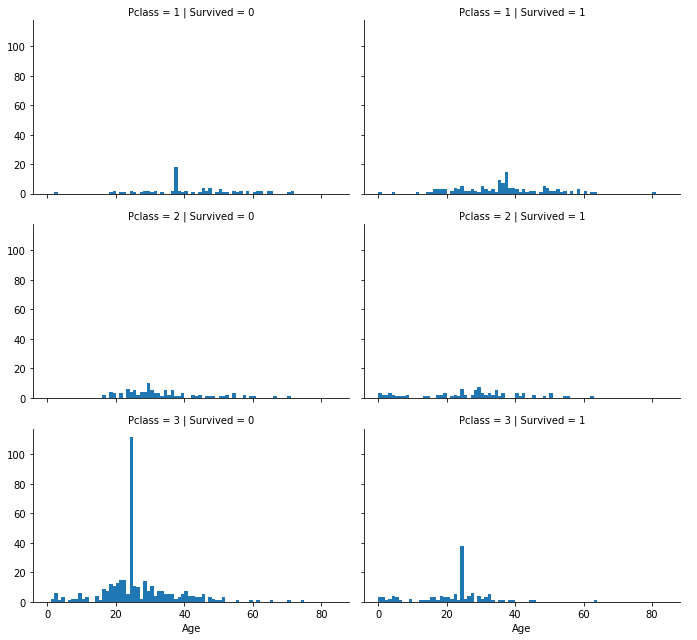

In [24]:
# AGE HISTOGRAM PER PCLASS AND SURVIVED
grid = sns.FacetGrid(age_fillna_test2, col='Survived', row='Pclass', height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
grid.map(plt.hist, 'Age', bins=bins)
grid.add_legend()

In [25]:
age_fillna_test2['Age'].value_counts().head()

24.0    166
37.0     36
29.0     31
22.0     27
18.0     26
Name: Age, dtype: int64

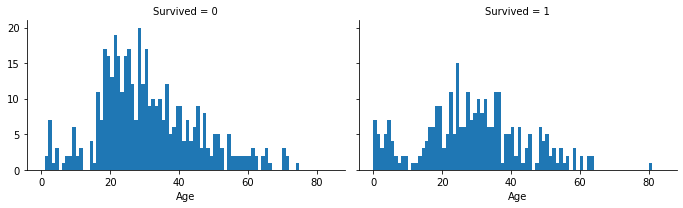

In [26]:
# AGE HISTOGRAM PER SURVIVED RATE 
g = sns.FacetGrid(train_data, col='Survived', height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
g.map(plt.hist, 'Age', bins=bins)

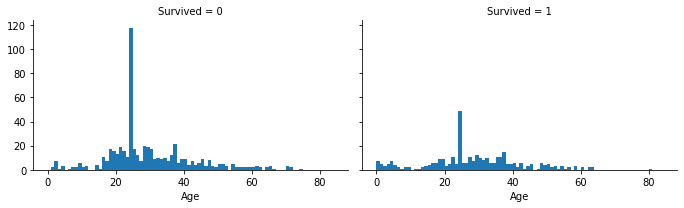

In [27]:
# AGE HISTOGRAM PER SURVIVED RATE 
g = sns.FacetGrid(age_fillna_test2, col='Survived', height=3, aspect=1.6)
bins = np.arange(0, 85, 1)
g.map(plt.hist, 'Age', bins=bins)

### 2.6 SibSp and Parch
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.

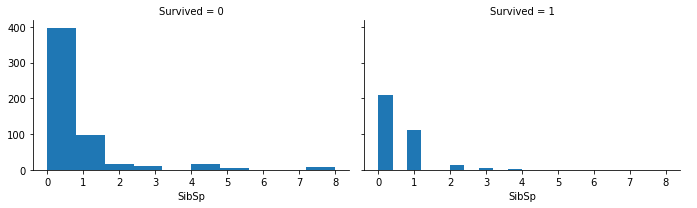

In [28]:
grid = sns.FacetGrid(train_data, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "SibSp")
grid.add_legend()

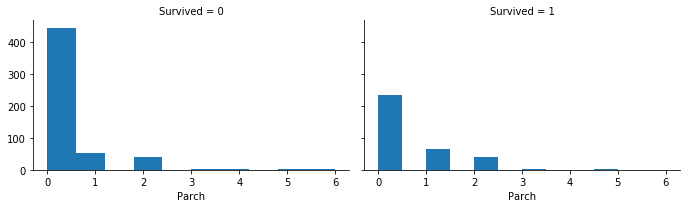

In [29]:
grid = sns.FacetGrid(train_data, col="Survived", height=3, aspect=1.6)
grid.map(plt.hist, "Parch")
grid.add_legend()

### 2.7 Ticket

In [30]:
train_data.Ticket.nunique()

681

In [31]:
train_data.Ticket.value_counts()

CA. 2343    7
1601        7
347082      7
347088      6
CA 2144     6
           ..
31418       1
371060      1
33638       1
211536      1
374887      1
Name: Ticket, Length: 681, dtype: int64

### 2.8 Fare

Fare    AxesSubplot(0.125,0.657941;0.227941x0.222059)
dtype: object

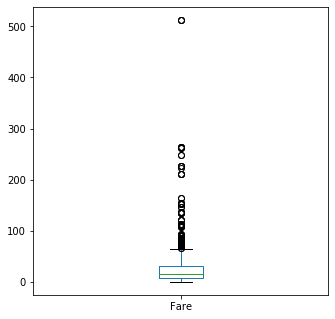

In [32]:
train_data[['Fare']].plot.box(subplots=True, layout=(3, 3), figsize=(18,18))

In [33]:
Q1, Q3 = train_data.Fare.quantile([0.25, 0.75])
Q1, Q3

(7.9104, 31.0)

In [34]:
IQR = Q3 - Q1
IQR

23.0896

In [35]:
maximum = Q3 + 1.5 * IQR
upper_outliers = train_data[train_data['Fare'] > maximum]
len(upper_outliers)/len(train_data)

0.13019079685746351

In [36]:
minimum = Q1 - 1.5 * IQR
lower_outliers = train_data[train_data['Fare'] < minimum]
len(lower_outliers)/len(train_data)

0.0

Fare will be devided into 5 range categories

### 2.9 Embarked

In [37]:
# COUND MISSING DATA IN EMBARKED
train_data.Embarked.isnull().sum()

2

In [38]:
train_data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
train_data['Embarked'].fillna(train_data['Embarked'].value_counts()[0])

train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Embarked missing data will be filled with most frequent attribute

# 3. Prepare the data

In [40]:
# from sklearn.ensemble import RandomForestClassifier

# y = train_data['Survived']

# features = ['Pclass', 'Sex', 'SibSp', 'Parch']
# X = pd.get_dummies(train_data[features])
# X_test = pd.get_dummies(test_data[features])

# X.head()

In [41]:
# model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerID': test_data.PassengerId, 
#                        'Survived': predictions})
# output.to_csv('my_submission.csv', index=False)
# print('Your submission was successfully saved')